## Observations and Insights

## Dependencies and starter code

In [105]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np



# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Convert Merged list into Data Frame
summary_stats = pd.DataFrame()

#Define the columns within the Data Frame from the merged dataset
#Group by Drug Regimen & perform arithmetic Calculations
summary_stats['Mean Tumor Vol'] = combined_results.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
summary_stats['Median Tumor Vol'] = combined_results.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
summary_stats['Tumor Volume Variance'] = combined_results.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
summary_stats['Tumor Volmue Std Dev.'] = combined_results.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
summary_stats['Tumor Volume Std. Err.'] = combined_results.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


summary_stats


,Mean Tumor Vol,Median Tumor Vol,Tumor Volume Variance,Tumor Volmue Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

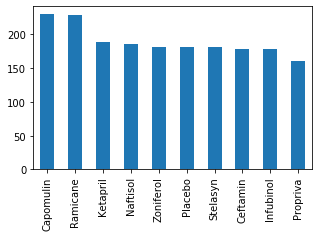

<Figure size 432x288 with 0 Axes>

In [107]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


#Unique Value for Coulumn within Filtered DataFrame  
drug_Regimen_bar = combined_results["Drug Regimen"].value_counts()


#Create a bar Chart using Pandas
drug_Regimen_bar.plot(kind="bar", figsize=(5,3))


plt.show()
plt.tight_layout()

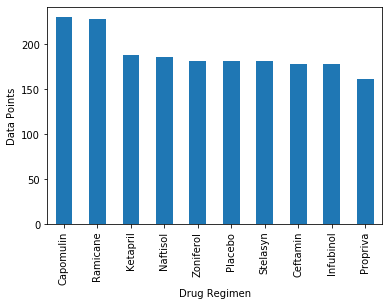

<Figure size 432x288 with 0 Axes>

In [108]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Create a bar chart using Pyplot 
drug_Regimen_chart = drug_Regimen_bar.plot(kind='bar')

# Set the xlabel and ylabel 
drug_Regimen_chart.set_xlabel("Drug Regimen")
drug_Regimen_chart.set_ylabel("Data Points")


plt.show()
plt.tight_layout()


## Pie plots

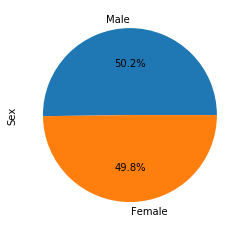

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Create DataFrame

male_female_counts = mouse_metadata['Sex'].value_counts()


male_female_counts.plot(kind='pie', autopct="%1.1f%%" )


([<matplotlib.patches.Wedge at 0x21792297be0>,
 [Text(-0.006911575355800912, 1.099978286206642, 'Male'),
  Text(0.00691167834320047, -1.0999782855595288, 'Female')],
 [Text(-0.0037699501940732243, 0.5999881561127138, '50.2%'),
  Text(0.0037700063690184376, -0.599988155759743, '49.8%')])

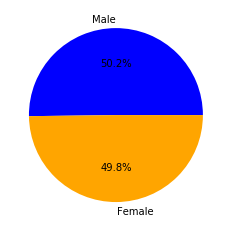

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Unique value of filtered column 
male_female_pie = mouse_metadata['Sex'].value_counts()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [50.2, 49.8]

# The colors of each section of the pie chart
colors = ["Blue", "Orange"]

# Creates the pie chart using Pandas

plt.pie(sizes, labels=labels, colors=colors,
       autopct="%1.1f%%")


## Quartiles, outliers and boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Create DataFrame to calculate Max Time Point
final_tumor_df = pd.DataFrame()
final_tumor_df ['Timepoint'] = combined_results.groupby(['Mouse ID']).max()['Timepoint']

#Create a new data frame to display the new combined tumor results 
combined_tumor_results = pd.merge(final_tumor_df, combined_results, how='left', on=['Mouse ID', 'Timepoint'])

#Calculate IQR
#Data frame for Capomulin
capomulin_df = combined_tumor_results.loc[combined_tumor_results['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']

#Data frame for Ceftamin
ceftamin_df = combined_tumor_results.loc[combined_tumor_results['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


#Data frame for Infubino
infubinol_df = combined_tumor_results.loc[combined_tumor_results['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']


#Data frame for Ramicane
ramicane_df = combined_tumor_results.loc[combined_tumor_results['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']



In [112]:
# Quartile Calculation within the Capomulin dataframe
capomulin_quartiles = capomulin_df.quantile([.25,.5,.75])
lowerq = capomulin_quartiles[0.25]
upperq = capomulin_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {capomulin_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [113]:
# Quartile Calculation within the Ceftamin dataframe
ceftamin_quartiles = ceftamin_df.quantile([.25,.5,.75])
lowerq = ceftamin_quartiles[0.25]
upperq = ceftamin_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {ceftamin_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
The the median of Tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [114]:
# Quartile Calculation within the Infubinol dataframe
infubinol_quartiles = infubinol_df.quantile([.25,.5,.75])
lowerq = infubinol_quartiles[0.25]
upperq = infubinol_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {infubinol_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [115]:
# Quartile Calculation within the Capomulin dataframe
ramicane_quartiles = ramicane_df.quantile([.25,.5,.75])
lowerq = ramicane_quartiles[0.25]
upperq = ramicane_quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {ramicane_quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


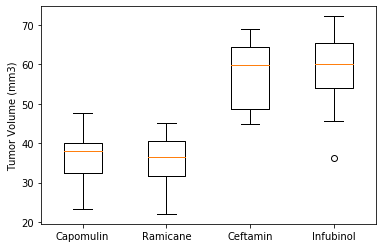

In [116]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# The second example again looks at the LAX temperature data set and computes quantiles



fig1, ax1 = plt.subplots()



ax1.set_ylabel('Tumor Volume (mm3)')

ax1.boxplot([capomulin_df,ramicane_df,ceftamin_df, infubinol_df],labels=['Capomulin','Ramicane','Ceftamin','Infubinol'])
plt.show()



## Line and scatter plots

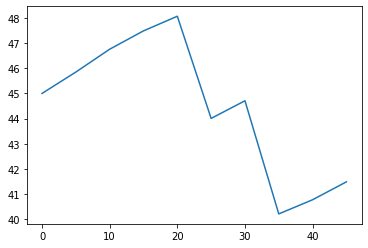

In [117]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = combined_results.loc[combined_results['Drug Regimen'] == 'Capomulin' ]


line_plot = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509' ]

plt.plot(line_plot['Timepoint'], line_plot['Tumor Volume (mm3)'])
plt.show()

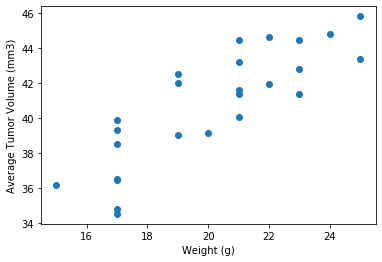

In [118]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


capomulin_table = combined_results.loc[combined_results['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



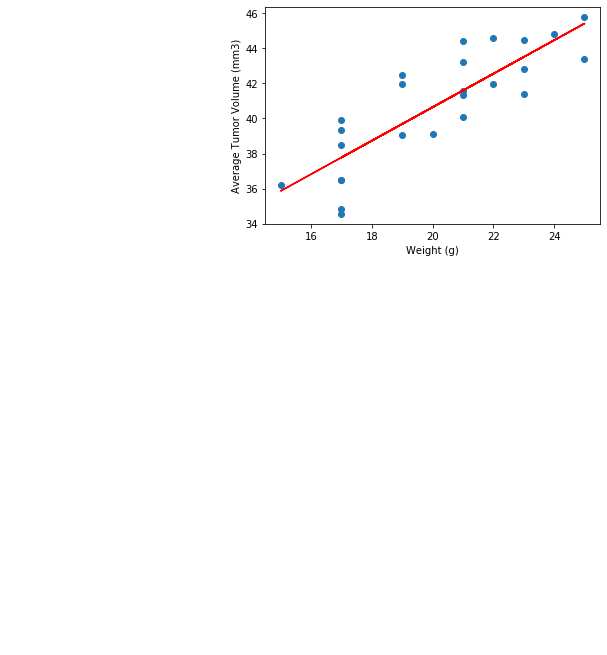

In [121]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

capomulin_table = combined_results.loc[combined_results['Drug Regimen'] == "Capomulin"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
#capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
#(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_table, capomulin_average)
#regress_values = capomulin_table * slope + intercept
regress_values = capomulin_average['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

 


